In [1]:
from mvlearn.embed.kcca import KCCA
from mvlearn.embed.dcca import DCCA
from mvlearn.embed.gcca import GCCA
%load_ext autoreload
%autoreload 2

import numpy as np
import collections
import matplotlib.pyplot as plt
from graspy.plot import pairplot
%matplotlib inline
import seaborn as sns

In [33]:
def make_data(kernel, N, seeds=[None]*4):
    ## Define two latent variables (number of samples x 1)
    np.random.seed(seeds[0])
    latvar1 = np.random.randn(N,)
    np.random.seed(seeds[1])
    latvar2 = np.random.randn(N,)
    
    ## Define independent components for each dataset (number of observations x dataset dimensions)
    np.random.seed(seeds[2])
    indep1 = np.random.randn(N, 4)
    np.random.seed(seeds[3])
    indep2 = np.random.randn(N, 5)
    #indep2 = np.random.randn(N, 4)
    
    if kernel == "linear":
        #x = 0.25*indep1 + 0.75*np.vstack((latvar1, latvar2, latvar1, latvar2)).T
        #y = 0.25*indep2 + 0.75*np.vstack((latvar1, latvar2, latvar1, latvar2, latvar1)).T
        
        x = 0.25*indep1 + 0.75*np.vstack((latvar1, latvar2, 0*latvar1, 0*latvar2)).T
        y = 0.25*indep2 + -0.75*np.vstack((latvar1, latvar2, 0*latvar1, 0*latvar2)).T
        
        return [x,y]
    
    elif kernel == "poly":
        x = 0.25*indep1 + 0.75*np.vstack((latvar1**2, latvar2**2, latvar1**2, latvar2**2)).T
        y = 0.25*indep2 + 0.75*np.vstack((latvar1, latvar2, latvar1, latvar2, latvar1)).T
        
        #x = 0.25*indep2 + 0.75*np.vstack((latvar1, latvar2, 0*latvar1, 0*latvar2)).T
        #y = 0.25*indep1 + 0.75*np.vstack((latvar1**2, latvar2**2, 0*latvar1**2, 0*latvar2**2)).T
        
        return [x,y]
    
    elif kernel == "gaussian":
        np.random.seed(seeds[0])
        t = np.random.uniform(-np.pi, np.pi, N)
        np.random.seed(seeds[1])
        e1 = np.random.normal(0, 0.05, (N,2))
        np.random.seed(seeds[2])
        e2 = np.random.normal(0, 0.05, (N,2))
        
        x = np.zeros((N,2))
        x[:,0] = t
        x[:,1] = np.sin(3*t)
        x += e1
        
        y = np.zeros((N,2))
        y[:,0] = np.exp(t/4)*np.cos(2*t)
        y[:,1] = np.exp(t/4)*np.sin(2*t)
        y += e2
        
        return [x,y]

In [16]:
def plot_components(components, method, transformation, labels=None):
    # We plot dimensions of both views to further show that the first two dimensions are linearly correlated ideally
    n_dim = components[0].shape[1]
    fig,axes = plt.subplots(n_dim,n_dim,figsize=(8,8))
    for i,ax in enumerate(axes.flatten()):
        dim2 = int(i/n_dim)
        dim1 = i % n_dim
        if not labels is None:
            ax.scatter(components[0][:,dim1],components[1][:,dim2], c=labels, alpha=0.2)
        else:
            ax.scatter(components[0][:,dim1],components[1][:,dim2])
        if dim2 == n_dim-1:
            ax.set_xlabel(f'View 1 Component {dim1+1}')
        if dim1 == 0:
            ax.set_ylabel(f'View 2 Component {dim2+1}')
        ax.axis('equal')
        #ax.set_xticks([])

    #plt.suptitle(f'{method} o {transformation} Transform')
    if method is not None:
        plt.savefig(f'./{method}_{transformation}_data.png',dpi=300,format='png')
    plt.show()
    
def compare_transforms(function, n = 200, save_name = None):
    data_transforms = ['linear', 'poly', 'gaussian']
    for transform in data_transforms:
        Xs_train = make_data(transform, n, seeds=[1,2,3,4])
        if function=='raw':
            plot_components(Xs_train, None, transform)
        else:
            Xs_test = make_data(transform, n, seeds=[5,6,7,8])
            components = function.fit(Xs_train).transform(Xs_test)
            plot_components(components, save_name, transform)

## Plot Transforms

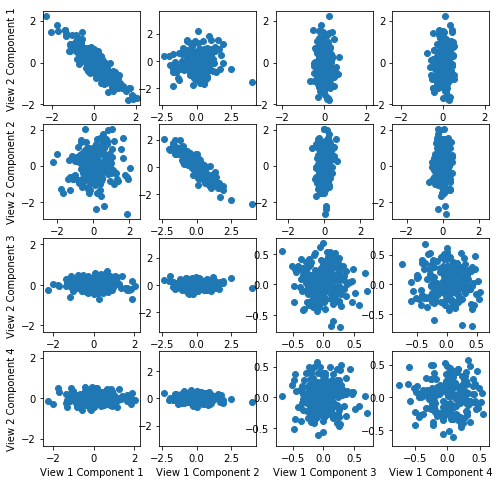

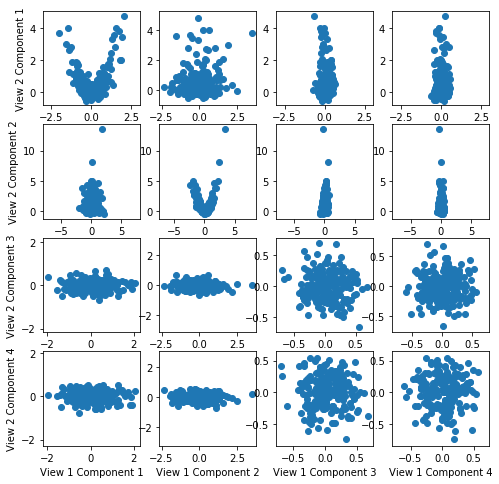

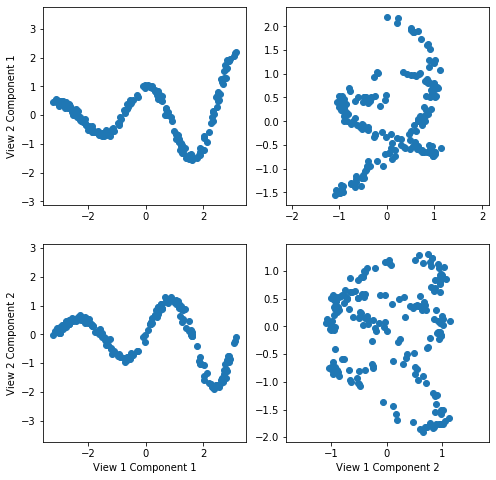

In [21]:
compare_transforms('raw')

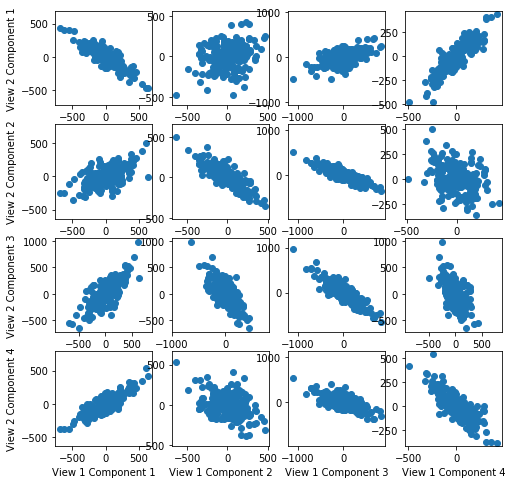

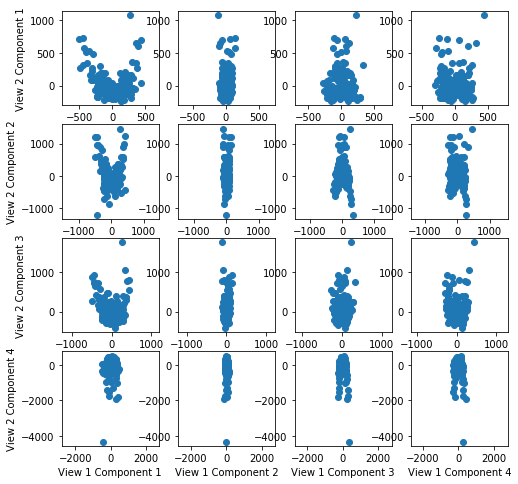

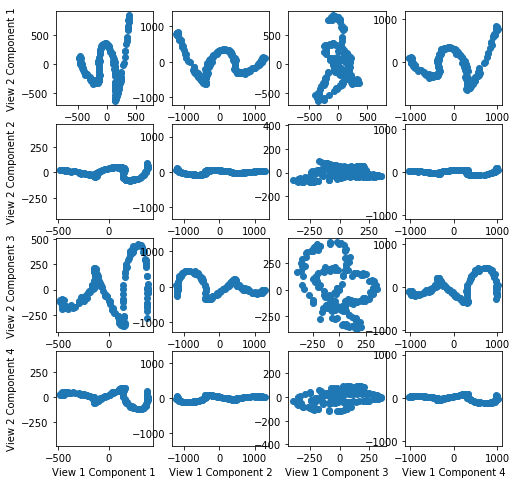

In [22]:
# kcca_l = KCCA(ktype ="linear", constant = 100.0, n_components = 4)
# linearkcca = kcca_l.fit_transform(Xs)
kcca = KCCA(ktype ="poly", constant = 100.0, degree = 2.0, n_components = 4)
compare_transforms(kcca)

In [34]:
Xs_train = make_data('poly', 200, seeds=[1,2,3,4])
Xs_test = make_data('poly', 200, seeds=[5,6,7,8])

kcca = KCCA(ktype ="poly", constant = 100.0, degree = 2.0, n_components = 4)
components = kcca.fit(Xs_train).transform(Xs_train)

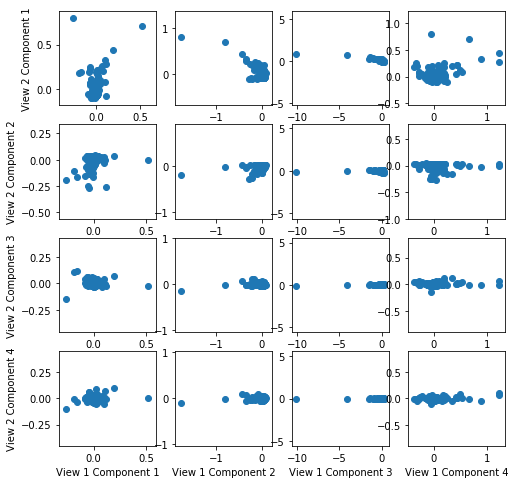

In [35]:
plot_components(components, None, None)